> ## **Métodos Computacionales II - Taller #2**

**Hecho por:** Thomas Andrade Hernández (202214695) & Juan Carlos Rojas V. (202214037)

---

In [1]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

>**Sección 2.9.2**

---

**1. Estabilidad I:** Usando el código de clase, estudie la estabilidad de los algoritmos Runge-Kutta de tercer y cuarto orden. Realice las gráficas y suposiciones que considere necesarias.

Para analizar la estabilidad de los algoritmos de Runge-Kutta de tercer y cuarto orden se llevará a cabo su implementación en éstas líneas, resolviendo la ecuación diferencial de la forma:

$$\frac{dy}{dx} = x + 2y \quad \text{ con $y(0) = 0$}.$$

In [2]:
def f(x,y):
    return x + 2*y

def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [3]:
def RungeKutta_Third(x):
    h = x[1] - x[0]
    y = np.zeros_like(x)
    y[0] = 0
    for i in range(1, len(x)):
        K1 = f(x[i-1],y[i-1])
        K2 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*K1*h)
        K3 = f(x[i-1] + 0.5*h, y[i-1] - K1*h + 2*K2*h)
        
        y[i] = y[i - 1] + (h/6)*(K1 + 4*K2 + K3)
        
    return y

def RungeKutta_Fourth(x):
    h = x[1] - x[0]
    y = np.zeros_like(x)
    y[0] = 0
    for i in range(1,len(x)):
        K1 = f(x[i-1],y[i-1])
        K2 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*K1*h)
        K3 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*K2*h)
        K4 = f(x[i-1] + h, y[i - 1] + K3*h)
        
        y[i] = y[i-1] + (1/6)*(K1 + 2*K2 + 2*K3 + K4)*h
    
    return y

<IPython.core.display.Javascript object>


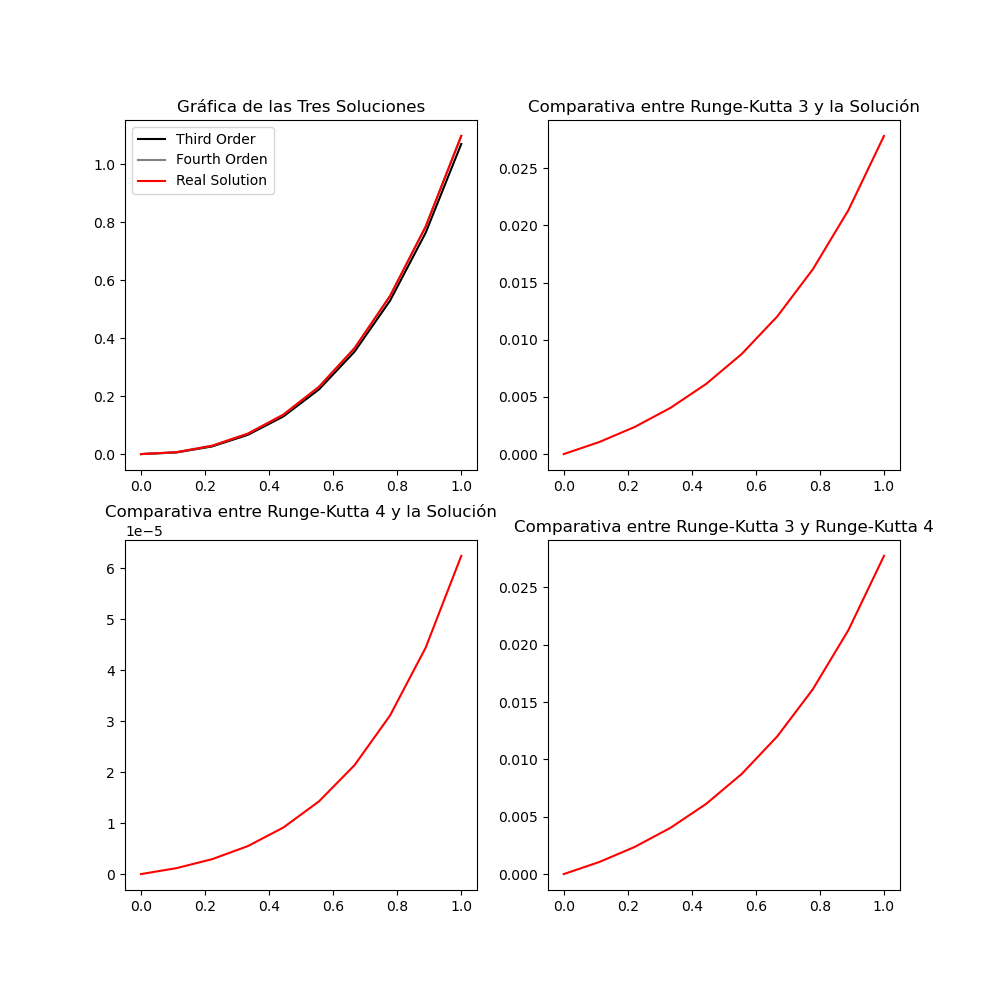

In [4]:
x = np.linspace(0, 1, 10)
y_3th = RungeKutta_Third(x)
y_4th = RungeKutta_Fourth(x)
y = Solucion(x)

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_title("Gráfica de las Tres Soluciones")
ax1.plot(x, y_3th, label = "Third Order", color = "black")
ax1.plot(x, y_4th, label = "Fourth Orden", color = "grey")
ax1.plot(x, y, label = "Real Solution", color = "red")

ax2.set_title("Comparativa entre Runge-Kutta 3 y la Solución")
ax2.plot(x, np.abs(y_3th - y), label = "Real Solution", color = "red")

ax3.set_title("Comparativa entre Runge-Kutta 4 y la Solución")
ax3.plot(x, np.abs(y_4th - y), label = "Real Solution", color = "red")

ax4.set_title("Comparativa entre Runge-Kutta 3 y Runge-Kutta 4")
ax4.plot(x, np.abs(y_4th - y_3th), label = "Real Solution", color = "red")

#plt.plot(x, np.abs(y - y_))
ax1.legend()

Como se puede apreciar en la parte superior, las gráficas presentadas muestran el comportamiento de los métodos de tercer y cuarto orden de Runge-Kutta en comparación con la solución analítica de la ecuación diferencial, verficando así la consistencia de ambos métodos al momento de dar una respuesta numérica al problema. No obstante, para visualizar la estabilidad de ambos métodos se debe de considerar la siguiente implementación con números complejos. 

In [5]:
def fc(z):
    return 1j*z

def Complex_Third():
    global theta
    global h_
    global f
    
    theta += h_
    K1 = fc(f)
    K2 = fc(f + 0.5*K1*h_)
    K3 = fc(f - K1*h_ + 2*K2*h_)
    
    f += (h_/6)*(K1 + 4*K2 + K3)
    
    
def Complex_Fourth():
    global theta
    global h_
    global f
    
    theta += h_
    K1 = fc(f)
    K2 = fc(f + 0.5*K1*h_)
    K3 = fc(f + 0.5*K2*h_)
    K4 = fc(f + K3*h_)
        
    f += (h_/6)*(K1 + 2*K2 + 2*K3 + K4)

In [6]:
theta = 0.
N = 15
Vueltas = 1
h_ = Vueltas * 2*np.pi/N
f = 1

SolucionRK3 = np.array([theta,f])

for i in range(N):
    Complex_Third()
    SolucionRK3 = np.vstack([SolucionRK3, np.array([theta,f])])

ReRK3 = np.real(SolucionRK3[:,1])
ImRK3 = np.imag(SolucionRK3[:,1])

In [7]:
theta = 0.
N = 15
Vueltas = 1
h_ = Vueltas * 2*np.pi/N
f = 1

SolucionRK4 = np.array([theta,f])

for i in range(N):
    Complex_Fourth()
    SolucionRK4 = np.vstack([SolucionRK4, np.array([theta,f])])

ReRK4 = np.real(SolucionRK4[:,1])
ImRK4 = np.imag(SolucionRK4[:,1])

<IPython.core.display.Javascript object>


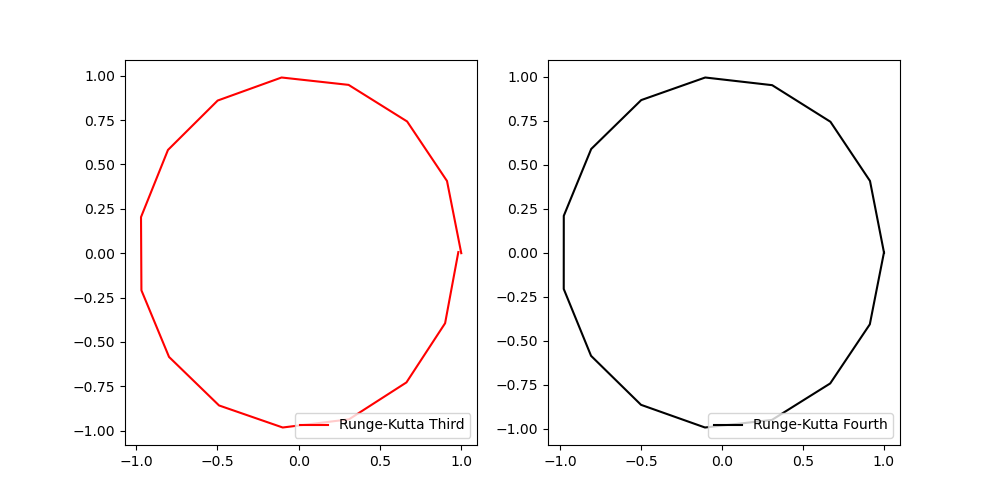

In [36]:
figC = plt.figure(figsize = (10, 5))
axC1 = figC.add_subplot(121)
axC2 = figC.add_subplot(122)

axC1.plot(ReRK3, ImRK3, label = "Runge-Kutta Third", color = "red")
axC2.plot(ReRK4, ImRK4, label = "Runge-Kutta Fourth", color = "black")
axC1.legend(loc = "lower right")
axC2.legend(loc = "lower right")

Para los gráficos anteriores se tomaron 15 puntos para ver las diferencias entre métodos más fácil. Se puede apreciar que en el caso de Runge-Kutta de tercer orden se requieren de mayor cantidad de puntos para poder conveger a la solución de interés, muy diferente al caso de Runge-Kutta de cuarto orden que requiere de muchos menos puntos para evidenciarse su estabilidad, manteniéndose en el régimen cerrado del circulo (en este caso, del polígono regular).

---

**2. Estabilidad II:** Para el algoritmo de Verlet:

**(a).** Muestre que el error del método está descrito por:

$$\epsilon_{n + 1} = (2 + h^{2}a_{n}') \cdot \epsilon_{n} + \epsilon_{n - 1} \qquad a_{n}' = \frac{\partial{a}}{\partial{x}}.$$

---

**Solución:** El método de integración de Verlet tiene su origen al considerar la suma entre el siguiente conjunto de ecuaciones para la posición de un cuerpo en un tiempo $t$:

$$x(t + \delta t) = x(t) + v(t)\delta t + \frac{(\delta t)^{2}}{2}a(t) + \mathcal{O}[(\delta t)^{3}]$$
$$x(t - \delta t) = x(t) - v(t)\delta t + \frac{(\delta t)^{2}}{2}a(t) - \mathcal{O}[(\delta t)^{3}]$$

Suma cuyo resultado es:

$$x(t + \delta t) + x(t - \delta t) = 2x(t) + a(t)(\delta t)^{2}$$

Donde la expresión $t + \delta t$ puede reescribirse bajo nuestra discretización como $n + 1$ (similar con los otros términos), y el $\delta t$ se reescribiría como el salto $h$. Ahora, si se considera a la aceleración como una función dependiente de la posición (el método no tiene en cuenta el tiempo per se), además de considerar los errores asociados al cómputo de cada $x_{i}$, la expresión queda en su totalidad como:

$$x_{n + 1} + \epsilon_{n + 1} + x_{n - 1} + \epsilon_{n - 1} = 2x_{n} + 2\epsilon_{n} + a(x_{n} + \epsilon_{n})h^{2}$$

Si aproximamos el error de la aceleración con una expansión de Taylor (dado epsilon pequeño), la expresión obtenida se resume en:

$$x_{n + 1} + \epsilon_{n + 1} + x_{n - 1} + \epsilon_{n - 1} = 2x_{n} + 2\epsilon_{n} + a(x_{n})h^{2} + \frac{\partial a(x_{n})}{\partial x_{n}}\epsilon_{n}h^{2}$$

Separando los términos que tienen consigo el error de aquellos que tienen sólo la expresión de la posición exacta se tiene:

$$\epsilon_{n + 1} + \epsilon_{n - 1} = 2\epsilon_{n} + \frac{\partial a(x_{n})}{\partial x_{n}}\epsilon_{n}h^{2}$$

$$\epsilon_{n + 1} = \left(2 + \frac{\partial a(x_{n})}{\partial x_{n}}h^{2}\right)\cdot \epsilon_{n} - \epsilon_{n - 1}$$

Siendo ésta la expresión de interés en nuestro caso.


---

**(b).** Para el caso de un oscilador armónico clásico muestre que:

$$\epsilon_{n + 1} = 2 \cdot (1 - R) \cdot \epsilon_{n} + \epsilon_{n - 1}$$

donde $2R = h^{2}\omega^{2}$.

---

**Solución:** Dado el caso del oscilador armónico clásico, mismo en el que se tiene la expresión $a = \ddot{x} = -\omega^{2}\cdot x$, la derivada en éste caso para $a$ con respecto a $x$ será $-\omega^{2}$. Por lo anterior se reescribe la ecuación obtenida en el anterior inciso intercambiando la derivada parcial con el valor calculado:

$$\epsilon_{n + 1} = \left(2 + \frac{\partial a(x_{n})}{\partial x_{n}}h^{2}\right)\cdot \epsilon_{n} - \epsilon_{n - 1}$$

$$\epsilon_{n + 1} = \left(2 - \omega^{2}h^{2}\right)\cdot \epsilon_{n} - \epsilon_{n - 1}$$

Asumiendo $2R = h^{2}\omega^{2}$ se llega a la expresión del enunciado:

$$\epsilon_{n + 1} = \left(2 - 2R\right)\cdot \epsilon_{n} - \epsilon_{n - 1}$$

$$\epsilon_{n + 1} = 2 \cdot (1 - R) \cdot \epsilon_{n} + \epsilon_{n - 1}$$

---

**(c).** Usando la suposición de la función potencia $\epsilon_{n} = \epsilon_{0}\lambda^{n}$, muestre que las raíces son:

$$\lambda_{\pm} = 1 - R \pm \sqrt{R^{2} - 2R}$$

---

**Solución:** Al realizar la suposición de la función potencia, la ecuación del inciso anterior se reescribiría como:

$$\epsilon_{n + 1} = 2 \cdot (1 - R) \cdot \epsilon_{n} + \epsilon_{n - 1}$$

$$\epsilon_{0}\lambda^{n + 1} = 2 \cdot (1 - R) \cdot \epsilon_{0}\lambda^{n} + \epsilon_{0}\lambda^{n - 1}$$

Dividiendo todo con $\epsilon_{0}\lambda^{n - 1}$, y desarrollando, se llega a la siguiente expresión:

$$\lambda^{2} = 2 \cdot (1 - R) \cdot \lambda + 1 \quad \longrightarrow \quad \lambda^{2} - 2 \cdot (1 - R) \cdot \lambda - 1 = 0$$

Resolviendo para $\lambda$ se tiene:

$$\lambda_{\pm} = \frac{2(1 - R) \pm \sqrt{4(1 - R)^{2} - 4}}{2} =  \frac{2(1 - R) \pm 2\sqrt{1 - 2R + R^{2} - 1}}{2}$$

$$\lambda_{\pm} = 1 - R \pm \sqrt{R^{2} - 2R}$$

---
**(d).** El valor de la estabilidad se obtiene para $\left|{\lambda_\pm}\right| \leq 1$. Muestre que el paso de integración debe cumplir:

$$h \leq \frac{2}{\omega}$$

Considerando el hecho de que $R$ es un número real, la construcción de la expresión para los $\lambda_{\pm}$ también debe de ser real. Más aún, dado que es la base de un método numérico, la presencia de un número complejo no representa algo palpable en los resultados del mismo, por ello, al sacar la norma de dicho número, podemos desglozarlo como una desigualdad como la siguiente:

$$\left|\lambda_{\pm}\right| = \left|1 - R \pm \sqrt{R^{2} - 2R}\right| \leq 1 \quad \longrightarrow \quad -1 \leq 1 - R \pm \sqrt{R^{2} - 2R} < 1$$

Operando para despejar el valor de $R$ se obtiene:

$$ - 2 \leq  - R \pm \sqrt{R^{2} - 2R} \leq 0$$

$$R - 2 \leq  \pm \sqrt{R^{2} - 2R} \leq R$$

Ésta raíz es consistente en tanto la función de en medio, $\pm \sqrt{R^{2} - 2R}$,  es siempre menor a la expresión $R$ en el intervalo $[2, \infty)$ donde se encuentra definida, dado que $R \geq 0$ y la raíz se indetermina en $(0, 2)$. Esto permite desarrollar:

$$R^{2} \leq  \left(\pm \sqrt{R^{2} - 2R}\right)^{2} \leq (R - 2)^{2}$$

$$R^{2} \leq  R^{2} - 2R \leq R^{2} - 4R + 4$$

Usando sólo el lado derecho de la desigualdad:

$$R^{2} - 2R \leq R^{2} - 4R + 4$$

$$2R \leq 4 \quad \longrightarrow \quad h^{2}\omega^{2} \leq 4$$

$$h \leq \frac{2}{\omega}$$

Es decir, el paso de la iteración tiene que mantenerse en un valor menor o igual a $2/\omega$.

---

**(e).** Implemente una rutina sencilla del método de Verlet para el oscilador armónico y muestre en una animación el comportamiento en la región estable y en la región inestable. Use $x(0) = 1$, $\dot{x}(0) = 1$ y $\omega = \pi$. Itere el tiempo suficiente para evidenciar el comportamiento de la estabilidad.

A continuación se puede apreciar un código que implementa el método de Verlet, más adelante se muestran gráficas que describen el comportamiento estable e inestable de éste algoritmo.

In [21]:
x0 = np.array([1., 1.])

t = np.arange(0, 10, 0.01)
x_computed = np.zeros_like(t)
x_real = np.zeros_like(t)
x_computed[0] = x0[0]

In [61]:
def Harmonic_Oscillator(x):
    return np.cos(np.pi*x) + (1/np.pi)*np.sin(np.pi*x)

def Verlet_Integration(x0, time, step):
    t = np.arange(0, time, step)
    x_computed = np.zeros_like(t)
    x_computed[0] = x0[0]
    x_real = np.zeros_like(t)
    
    for i in range(0, len(t) - 1):
        a = -(np.pi**2) * x_computed[i]
        if i == 0:
            v_ = x0[1] + step*a
            x_computed[i + 1] = x_computed[i] + step*v_
        else:
            x_computed[i + 1] = 2*x_computed[i] - x_computed[i - 1] + a*(step**2)
        
        x_real[i] = Harmonic_Oscillator(t[i])
    return x_computed, x_real, t

In [90]:
x_good, x_real1, t_good = Verlet_Integration(x0, 15, 0.1)
x_bad, x_real2, t_bad = Verlet_Integration(x0, 15, 0.64)

<IPython.core.display.Javascript object>


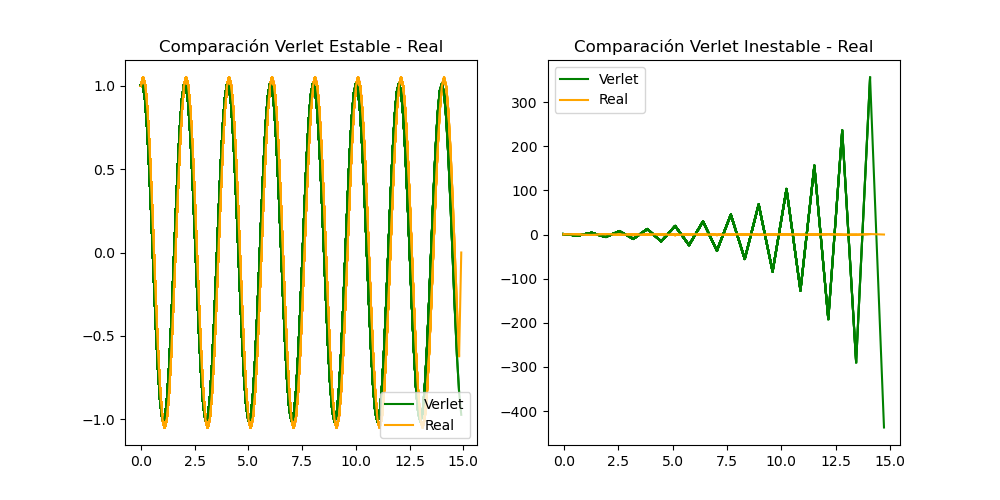

In [97]:
figV = plt.figure(figsize = (10, 5))
axV1 = figV.add_subplot(121)
axV2 = figV.add_subplot(122)

scale = 1
t_good = t_good[::scale]
t_bad = t_bad[::scale]

def UpdateV(i):
        
    axV1.set_title("Comparación Verlet Estable - Real")
    axV1.plot(t_good[:i], x_good[::scale][:i], color = "green")
    axV1.plot(t_good[:i], x_real1[::scale][:i], color = "orange")    
    
    if i <= len(t_bad) - 1:
        axV2.set_title("Comparación Verlet Inestable - Real")
        axV2.plot(t_bad[:i], x_bad[::scale][:i], color = "green")
        axV2.plot(t_bad[:i], x_real2[::scale][:i], color = "orange")
    
    if i == len(t_good) - 1:
        axV1.plot(t_good, x_good[::scale], color = "green", label = "Verlet")
        axV1.plot(t_good, x_real1[::scale], color = "orange", label = "Real")
        axV2.plot(t_bad, x_bad[::scale], color = "green", label = "Verlet")
        axV2.plot(t_bad, x_real2[::scale], color = "orange", label = "Real")
        axV1.legend(loc = "lower right")
        axV2.legend()
        

Animation = anim.FuncAnimation(figV, UpdateV, frames = len(t_good), repeat = False)

Como se puede apreciar en la animación anterior, el método de Verlet para el oscilador armónico converge medianamente bien, más no lo suficiente, para la forma básica de la función sinusoidal producto del problema. Por otro lado, al utilizar un paso que sea un poco por encima del paso máximo, el método empieza a diverger considerablemente, mostrando una función osciladora con amplitud creciente.

---

**3.** Resolver analíticamente la ecuación diferencial de Riccati:

$$x^{3}y' = x^{4}y^{2} - 2x^{2}y - 1$$

Una solución particular esta dada por: $y_{1} = x^{-2}$. Encuentre numéricamente la solución usando alguno de los métodos vistos en clase con la condición inicial $y(\sqrt{2}) = 0.$

> **Solución:**

Teniendo en cuenta de que se trata de una ecuación de Riccati, se puede conseguir una expresión equivalente multiplicando a ambos lados por $x^{-3}$, obteniendo: $$ y' = xy^2 - \frac{2y}{x} - \frac{1}{x^3}$$ Tomando, entonces, que $y = y_1 + z$, se tiene que $$ y'_1 + z' = x(y_1 + z)^2 - \frac{2}{x}(y_1 + z) - \frac{1}{x^3} $$ expandiendo se obtiene que: 
$$ y'_1 + z' = xy_1^2 + 2xy_1z + xz^2 - \frac{2y_1}{x} - \frac{2z}{x} - \frac{1}{x^3}.$$ Usando que $y_1$ es solución a la ecuación diferencial, la ecuación se puede reducir a:
$$z' = \left(2xy_1 -\frac{2}{x}\right)z + xz^2 $$ Además, reemplazando $y_1 = x^{-2}$: 
$$z' = xz^2$$ Ahora, tómese $z = u^{-1} \implies z' = u^{-2}u'$. Entonces
$$-u^{-2}u' = xu^{-2} \leftrightarrow u' = x \implies u = -\frac{x^2}{2} + c_1$$ Entonces, $z = \left(-\frac{x^2}{2} + c_1\right)^{-1}$ Por lo que la solución general de la EDO, es $$y = x^{-2} + \left(-\frac{x^2}{2} + c_1\right)^{-1}$$ Tomando la condición inicial $$0 = \frac{1}{2} + \frac{1}{-1 + c_1} \implies c_1 = -1.$$ La solución es, entonces $$\boxed{y = x^{-2} - \left(\frac{x^2}{2} +1\right)^{-1}}$$

<IPython.core.display.Javascript object>


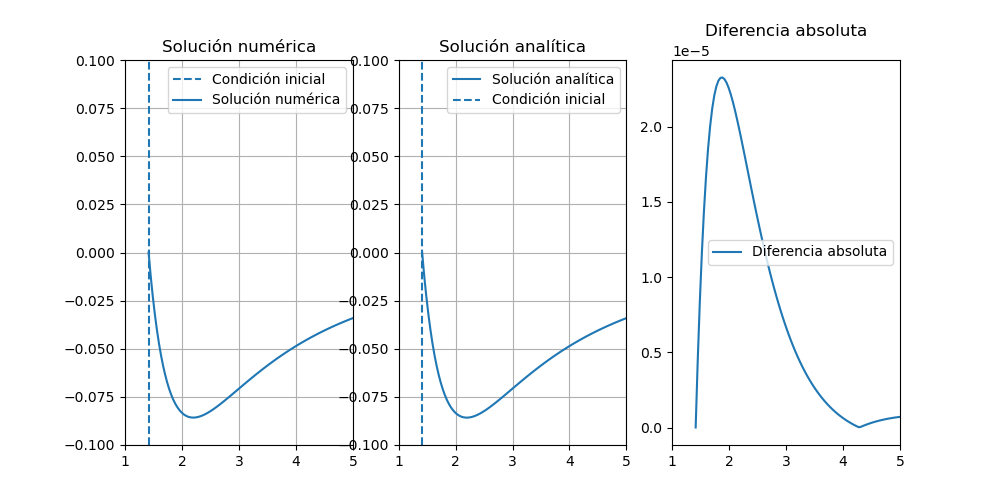

(<matplotlib.legend.Legend at 0x266c61a2d50>,
 None)

In [13]:
def RealFunktion(x):
    return 1/x**2 - 1/(x**2/2 + 1)

def f(x,y):
    return x*y**2-2*y/x-1/x**3

def GetEuler2(f,x):
    dx = x[1] - x[0]
    y = np.zeros_like(x)
    y[0] = 0
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i],y[i-1]+k1*dx)
        
        y[i] = y[i-1]+.5*(k1+k2)*dx
    
    return y

x = np.linspace(np.sqrt(2),5,100)

y_sol = GetEuler2(f,x)

figy_solv = plt.figure(figsize=(10,5))
ax1 = figy_solv.add_subplot(131)
ax2 = figy_solv.add_subplot(132)
ax3 = figy_solv.add_subplot(133)

ax1.set_title("Solución numérica")
ax2.set_title("Solución analítica")
ax3.set_title("Diferencia absoluta")



ax1.grid()
ax2.grid()

ax1.set_xlim(1,5)
ax1.set_ylim(-0.1,0.1)

ax2.set_xlim(1,5)
ax2.set_ylim(-0.1,0.1)

ax3.set_xlim(1,5)

ax1.vlines(np.sqrt(2),-0.1,0.1,linestyles="dashed",label="Condición inicial")
ax1.plot(x,y_sol,label="Solución numérica")

ax2.plot(x,RealFunktion(x),label="Solución analítica")
ax2.vlines(np.sqrt(2),-0.1,0.1,linestyles="dashed",label="Condición inicial")

ax3.plot(x,abs(RealFunktion(x)-y_sol),label="Diferencia absoluta")

ax1.legend(),ax2.legend(),ax3.legend(),plt.subplots_adjust()

---

**4.** Resolver analíticamente la ecuación diferencial no lineal:

$$\frac{du}{dt} = u^{q}, \ t \in \left[0, 10\right]$$

La solución exacta es: $u(t) = e^{t}$ para $q = 1$ y $u(t) = \left(t \cdot (1 - q) + 1 \right)^{\frac{1}{1 - q}}$ para $q < 1$ y $t \cdot (1 - q) + 1 > 0$.



> **Solución:**
La solución para $q=1$ es trivial, $$u(t) = e^{t}$$
Para $q<1$ se presenta una ecuación diferencial de Bernoulli por lo que se considera la función $z = u^{1-q}$ que permite obtener:
$$u = z^{\frac{1}{1-q}} \text{  y  } \frac{\text{d}u}{\text{d}t} = \frac{1}{1-q}z^{\frac{1}{1-q}-1}\frac{\text{d}z}{\text{d}t}.$$ Ahora, usando la consideración inicial, se obtiene que:

$$
\begin{aligned}
zu^{-1} &= u^{-q} \\
\frac{z}{z^{\frac{1}{1-q}}} &= (1-q)z^{1-\frac{1}{1-q}}\left( \frac{\text{d}z}{\text{d}t}\right)^{-1} \\
z &= (1-q)z\left( \frac{\text{d}z}{\text{d}t}\right)^{-1} \\
\frac{\text{d}z}{\text{d}t} &= 1-q \\ 
\implies z &= (1-q)t+c_1 \\
\implies u &= ((1-q)t + c_1)^{\frac{1}{1-q}}
\end{aligned}
$$

Si se toma que $u(0) = 1$, se obtiene que 
$$1 = c_1^{\frac{1}{1-q}} \implies c_1 = 1.$$ Siendo la solución para $q<0$
$$\boxed{u(t) = \left((1-q)t +1\right)^{\frac{1}{1-q}}}$$

**5.** Encontrar la solución numéricamente para algunos valores de $q = \left[0., 0.2, 0.4, 0.7, 0.9, 1.\right]$.


> **Solución:**

<IPython.core.display.Javascript object>


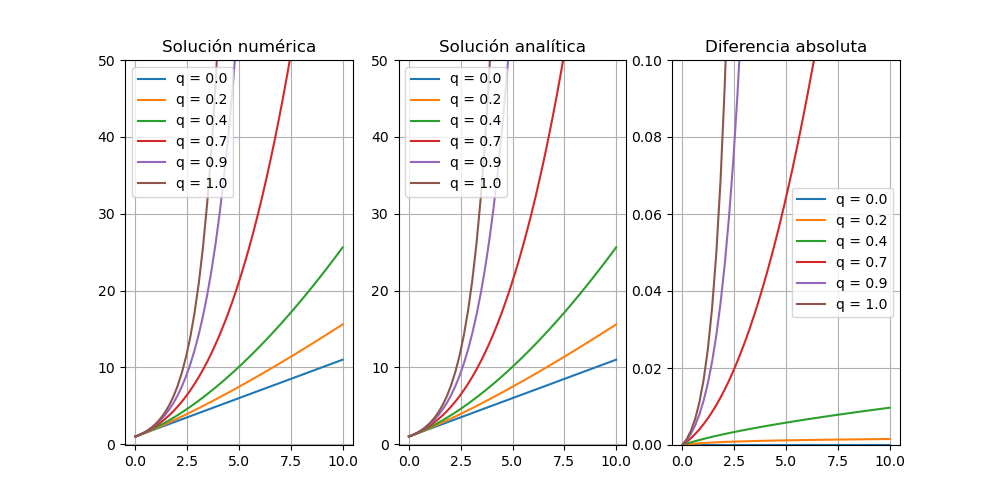

In [14]:
fig_solving = plt.figure(figsize=(10,5))
ax4 = fig_solving.add_subplot(131)
ax5 = fig_solving.add_subplot(132)
ax6 = fig_solving.add_subplot(133)

q = np.array([0.,.2,.4,.7,.9,1])

def Funktion(y,q):
    return y**q

def RealFunc(t,q):
    return (t*(1-q)+1)**(1/(1-q))

def GetEuler2(f,x,q):
    dx = x[1] - x[0]
    y = np.zeros_like(x)
    y[0] = 1
    for i in range(1,len(x)):
        k1 = f(y[i-1],q)
        k2 = f(y[i-1]+k1*dx,q)
        
        y[i] = y[i-1]+.5*(k1+k2)*dx
    
    return y

t = np.linspace(0,10)
y_solv = [0]*len(q)
ax4.set_ylim(-0.1,50)
ax4.grid()
ax5.set_ylim(-0.1,50)
ax5.grid()
ax6.set_ylim(0,0.1)
ax6.grid()

for i,j in enumerate(q):
    y_solv[i] = GetEuler2(Funktion,t,j)
    ax4.plot(t,y_solv[i],label="q = %s"%(j))
    
for i in q:
    if not i == 1:
        ax5.plot(t,RealFunc(t,i),label="q = %s"%(i))
        
    else:
        ax5.plot(t,np.exp(t),label="q = %s"%(i))

for i,j in enumerate(q):
    if not j == 1:
        ax6.plot(t,abs(y_solv[i]-RealFunc(t,j)),label="q = %s"%(j))
    else:
        ax6.plot(t,abs(y_solv[i]-np.exp(t)),label="q = %s"%(j))
        
ax4.set_title("Solución numérica")
ax5.set_title("Solución analítica")
ax6.set_title("Diferencia absoluta")

ax4.legend()
ax5.legend()
ax6.legend()



---

**6. Precesión de la órbita de Mercurio:** [Contexto entero en las notas de clase]. Demuestre las expresiones de las siguientes ecuaciones:

$$\vec{r}(t + \Delta t) = \vec{r}(t) + \vec{v}(t)\Delta t + \frac{1}{2}\vec{a}(t)\left(\Delta t\right)^{2},\qquad \vec{v}(t + \Delta t) = \vec{v}(t) + \frac{\Delta t}{2} \left(\vec{a}(t + \Delta t)  + \vec{a}(t) \right)$$

$$\vec{r}(0) = \left[a \cdot (1 + e), \ 0.\right], \qquad \vec{v}(0) = \left[0.,\ \sqrt{G \cdot \frac{1 - e}{a \cdot (1 + e)}} \right]$$

---

Genere una simulación en la que use un paso temporal del mismo orden de $\alpha \approx \Delta t$ para poder medir el efecto de la precesión. Genere al menos 10 órbitas alrededor del Sol guardando en un archivo de datos el tiempo en años terrestres que tarda mercurio en llegar al perihelio y el ángulo de llegada que debe ser cercano a $180^{\circ}$. Usando el archivo de datos grafique 2 veces el ángulo de llegada vs 2 veces el tiempo en años terrestre que le toma en llegar de nuevo al perihelio.

In [15]:
G, alpha, e, a = 4*np.pi**2, 1.1e-8, 0.205630,0.387098

def Aceleration(r):
    d = np.linalg.norm(r)
    return -(G/d**3)*(1 + alpha/(d**2))*r

def Verlet_Moded(x0, time, step):
    t = np.arange(0, time, step)
    
    x_computed = np.zeros((len(t), 2))
    v_computed = np.zeros((len(t), 2))
    a_computed =np.zeros((len(t), 2))
    
    x_computed[0] = x0[0]
    v_computed[0] = x0[1]
    
    for i in tqdm(range(len(t) - 1), desc='Trust me. Let me cook', unit=' Steps'):
        a_computed[i] = Aceleration(x_computed[i])
        if i == 0:
            v_computed[i + 1] = v_computed[i] + step*a_computed[i]
            x_computed[i + 1] = x_computed[i] + step*v_computed[i]
        else:
            x_computed[i + 1] = 2*x_computed[i] - x_computed[i - 1] + a_computed[i]*(step**2)
            a_computed[i + 1] = Aceleration(x_computed[i + 1])
            v_computed[i + 1] = v_computed[i] + (a_computed[i + 1] + a_computed[i])*(step/2)

    return x_computed, t

In [16]:
x0 = np.array([np.array([a*(1 - e), 0]), np.array([0, np.sqrt(G*(1 + e)/(a*(1. - e)))])])
t = np.arange(0, 1, 0.1)
x = np.zeros((len(t), 2))
x[0] = x0[0]
x[0]

array([0.30749904, 0.        ])

In [17]:
x, t = Verlet_Moded(x0, 1, 0.00001)

Trust me. Let me cook: 100%|██████████████████████████████████████████████| 99999/99999 [00:02<00:00, 41160.10 Steps/s]


In [18]:
norms = np.array([])
for i in range(0, len(x)):
    norms = np.append(norms, np.linalg.norm(x[i]))
norms

array([0.30749904, 0.30749906, 0.3074991 , ..., 0.35404913, 0.35406979,
       0.35409044])

<IPython.core.display.Javascript object>


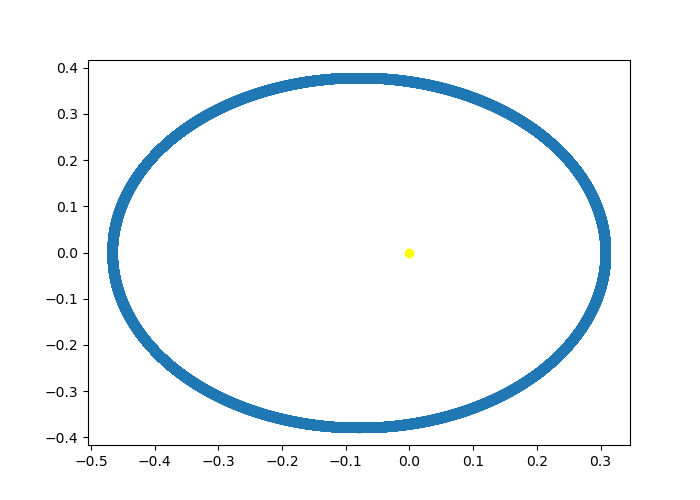

In [19]:
figu = plt.figure(figsize = (7, 5))
plt.scatter(0, 0, color = "yellow")
plt.scatter(x[:,0], x[:,1])